In [15]:
# Dependencies
import json
import tweepy
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
import time


In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Search Term - = "@CNNbrk" “@FoxNews” “@nytimes” “@BBCBreaking”  “@CBSNews”
cnn_target_term = "@CNNbrk"
fox_target_term = "@FoxNews"
nytimes_target_term = "@nytimes"
bbc_target_term = "@BBCBreaking"
cbs_target_term = "@CBSNews"

In [6]:
# Target User Accounts
target_user = ("@CNNbrk", "@FoxNews", "@nytimes", "@BBCBreaking", "@CBSNews")

# List for dictionaries of results
results_list = []

# List for tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
sentiments = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
            
            sentiments.append({
                    "User": user,
                    "Tweet": tweet["text"],
                    "Date": tweet["created_at"], 
                    "Compound": compound,
                    "Positive": pos,
                    "Negative": neg,
                    "Neutral": neu})

    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }

    # Append dictionary to list
    results_list.append(user_results)

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")

User: @CNNbrk
Compound: -0.215
Positive: 0.043
Neutral: 0.833
Negative: 0.124
User: @FoxNews
Compound: -0.040
Positive: 0.076
Neutral: 0.829
Negative: 0.095
User: @nytimes
Compound: -0.081
Positive: 0.059
Neutral: 0.851
Negative: 0.089
User: @BBCBreaking
Compound: -0.278
Positive: 0.063
Neutral: 0.767
Negative: 0.170
User: @CBSNews
Compound: -0.088
Positive: 0.060
Neutral: 0.846
Negative: 0.094


In [7]:
pd_user_data = pd.DataFrame(sentiments)
pd_user_data.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,User
0,-0.2263,Fri Aug 24 18:04:53 +0000 2018,0.101,0.899,0.000,RT @CNNPolitics: BREAKING: President Donald Tr...,@CNNbrk
1,0.0000,Fri Aug 24 17:12:36 +0000 2018,0.000,1.000,0.000,Zimbabwe's constitutional court upholds Presid...,@CNNbrk
2,-0.2023,Fri Aug 24 16:31:22 +0000 2018,0.096,0.904,0.000,RT @CNNPolitics: Former Director of the CDC To...,@CNNbrk
3,0.7506,Fri Aug 24 16:25:43 +0000 2018,0.000,0.697,0.303,"""Lifestyles of the Rich and Famous"" host Robin...",@CNNbrk
4,-0.8481,Fri Aug 24 15:12:03 +0000 2018,0.351,0.649,0.000,Sen. John McCain has chosen to stop receiving ...,@CNNbrk


In [8]:
#CNN Data
cnn_data = pd_user_data[pd_user_data['User'] == "@CNNbrk"]
#FOX Data
fox_data = pd_user_data[pd_user_data['User'] == "@FoxNews"]
#NyTimes Data
nytimes_data = pd_user_data[pd_user_data['User'] == "@nytimes"]
#BBC Data
bbc_data = pd_user_data[pd_user_data['User'] == "@BBCBreaking"]
#CBS Data
cbs_data = pd_user_data[pd_user_data['User'] == "@CBSNews"]

<IPython.core.display.Javascript object>


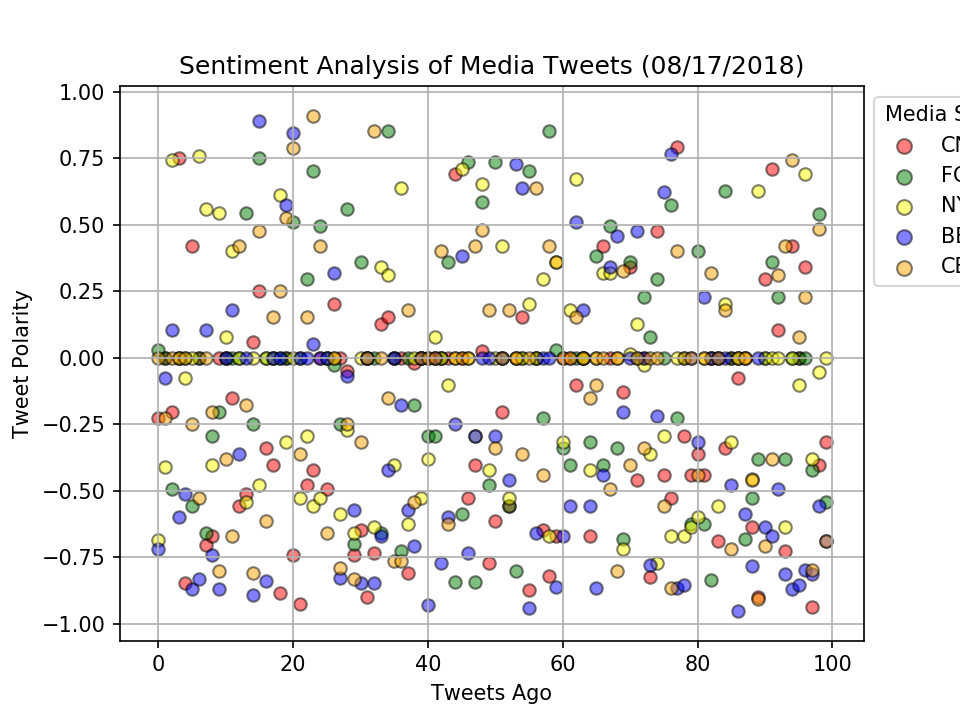

In [24]:
# Bubble Scatter Plot
# Scatter plot for CNN
CNN = plt.scatter(x = range(len(cnn_data["Compound"])),y = cnn_data["Compound"], marker="o", facecolors="red", edgecolors="black", alpha =0.5)
# Scatter plot for FOX 
Fox = plt.scatter(x = range(len(fox_data["Compound"])),y = fox_data["Compound"], marker="o", facecolors="green", edgecolors="black", alpha =0.5)
# Scatter plot for Nytimes
NyTimes = plt.scatter(x = range(len(nytimes_data["Compound"])),y = nytimes_data["Compound"], marker="o", facecolors="yellow", edgecolors="black", alpha =0.5)
# Scatter plot for BBC
BBC = plt.scatter(x = range(len(bbc_data["Compound"])),y = bbc_data["Compound"], marker="o", facecolors="blue", edgecolors="black", alpha =0.5)
# Scatter plot for CBS 
CBS = plt.scatter(x = range(len(cbs_data["Compound"])),y = cbs_data["Compound"], marker="o", facecolors="orange", edgecolors="black", alpha =0.5)

                  
                  
#labels
plt.title("Sentiment Analysis of Media Tweets (08/17/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
#Legend
lgnd = plt.legend((CNN, Fox, NyTimes, BBC, CBS),('CNN', 'FOX', 'NY Times', 'BBC', 'CBS'), title="Media Sources", bbox_to_anchor=(1, 1))
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[3]._sizes = [50]
lgnd.legendHandles[4]._sizes = [50]


#grid
plt.grid()

#Show Figure
plt.show()

#Save Figure
plt.savefig("./Images/mediatweetsentimentanalysis.png")

In [21]:
pd_results_data = pd.DataFrame(results_list)
pd_results_data.head()

,Compound Score,Negative Score,Neutral Score,Postive Score,Username
0,-0.215289,0.12416,0.83286,0.04297,@CNNbrk
1,-0.040096,0.09503,0.82879,0.07615,@FoxNews
2,-0.080856,0.08931,0.85149,0.05920,@nytimes
3,-0.277686,0.17018,0.76706,0.06272,@BBCBreaking
4,-0.088392,0.09420,0.84617,0.05963,@CBSNews


In [22]:
plt.bar(pd_results_data["Username"], pd_results_data["Compound Score"], color=["red", "green", "yellow", "blue", "orange"], align="center")
plt.title("Overall Sentiment Analysis of Media Tweets (08/17/2018)")
plt.ylabel("Tweet Polarity")

#Save Figure
plt.savefig("./Images/mediatweetoverallsentimentanalysis.png")
#Show Figure
plt.show()

In [23]:
# Export the data in the DataFrame into a CSV file.

pd_user_data.to_csv("MediaTweets.csv", encoding='utf-8', index=False)
